# LINEAR REGRESSION

Uses a linear function to predict the (average) numerical value of Y for a given value of X using a straight line (called the regression line)


y = β0 + β1x

<br>
Where:
* y  : target/predicted value
* β0 : y-intercept
* β1 : slope or coefficient

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
#Train-Test Split Module
from sklearn.model_selection import train_test_split

#Linear Regression Algorithm from sklearn
from sklearn.linear_model import LinearRegression

#Metrics to measure model performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Load and Explore the Dataset

In [3]:
#Load the boston dataset from sklearn

from sklearn.datasets import load_boston

boston = load_boston()

In [4]:
#Description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#Convert dataset into a Pandas Dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
#Add the target variable: Median Price ("PRICE")
df["PRICE"] = boston.target

In [7]:
#Check the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#Describe the dataset
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Correlation

**Correlation Coefficient**: *a statistical measure that calculates the strength of the relationship between the relative movements of the two variables.*

Returns a value between -1 and 1, where:
* 1 indicates a strong positive relationship.
* -1 indicates a strong negative relationship.
* A result of zero indicates no relationship at all.

Most Widely Used: Pearson’s Correlation Coefficient Formula


<a href="https://www.youtube.com/watch?v=2B_UW-RweSE"> Correlation Explainer Video Link </a>

In [9]:
#Get the correlation of the attributes
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


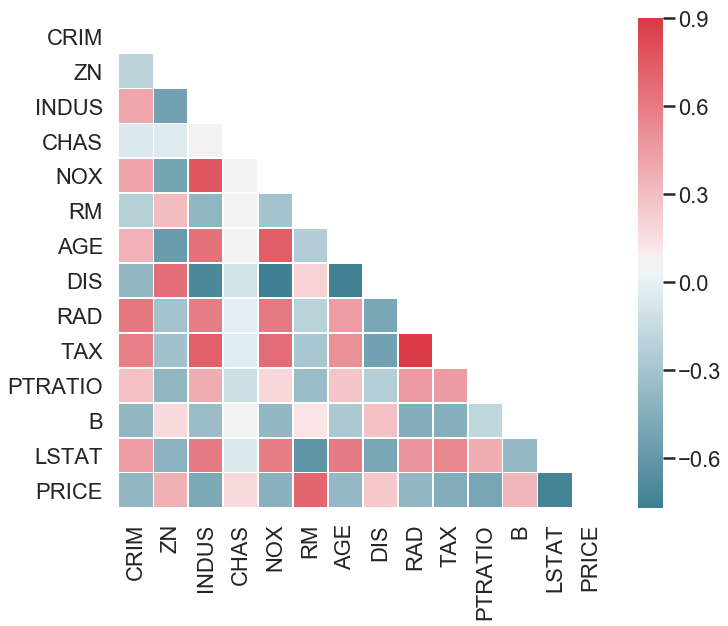

In [10]:
#Visualize Correlation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, square=True, linewidths=.5, ax=ax)

## Build the Model

In [11]:
#Consider only 1 attribute to be used for regression, for this example we'll test with RM (number of rooms)
df_x = df["RM"]

#consider volume as our target
df_y = df["PRICE"]
len(df_x), len(df_y)

(506, 506)

In [12]:
#reshapping the dataset
df_x_reshape = df_x.values.reshape(-1, 1)
df_y_reshape = df_y.values.reshape(-1, 1)
len(df_x_reshape), len(df_y_reshape)

(506, 506)

In [13]:
#Split the dataset into Train and Test Sets
x_train, x_test, y_train, y_test = train_test_split(df_x_reshape, df_y_reshape, test_size=0.30, random_state = 5)

print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(354, 1) (354, 1) (152, 1) (152, 1)


Text(0.5, 1.0, 'RM vs PRICE')

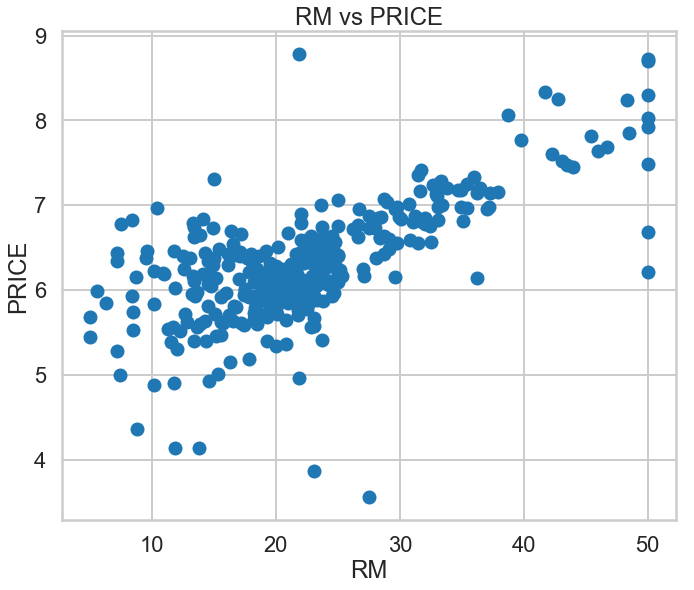

In [14]:
#Visualize the relationship
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(y_train, x_train)
plt.xlabel("RM")
plt.ylabel("PRICE")
plt.title("RM vs PRICE")


In [15]:
#Instantiate the Linear Regression Algorithm
linreg = LinearRegression()

#Train the Model
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#Extract Coefficient and Intercept
print(("Coefficient: %.2f") %linreg.coef_)
print(("Intercept: %.2f") %linreg.intercept_)
print(("y = %.2fx + %.2f") %(linreg.coef_, linreg.intercept_))

Coefficient: 8.83
Intercept: -33.03
y = 8.83x + -33.03


## Validate the Model

In [17]:
#Predict on the Test Set
y_pred = linreg.predict(x_test)

In [18]:
#Measure the performance of the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(("r2: %.2f") %r2)
print(("mae: %.2f") %mae)
print(("mse: %.2f") %mse)

r2: 0.51
mae: 4.24
mse: 46.68


In [19]:
#Get a table of the results
df_results = pd.DataFrame(y_test, columns=['Actual'])
df_results['Predicted'] = y_pred
df_results.head()

,Actual,Predicted
0,37.6,37.945153
1,27.9,25.497359
2,22.6,23.616948
3,13.8,10.277504
4,35.2,34.864103


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

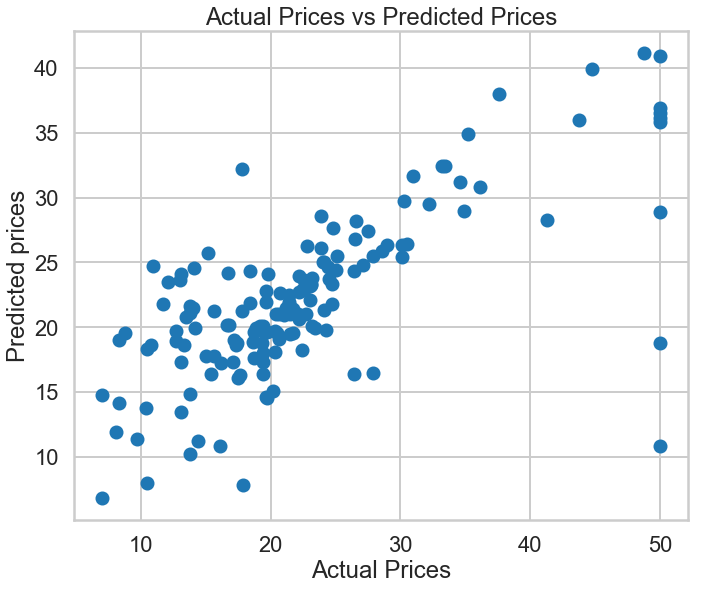

In [20]:
#Visualize the results
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")

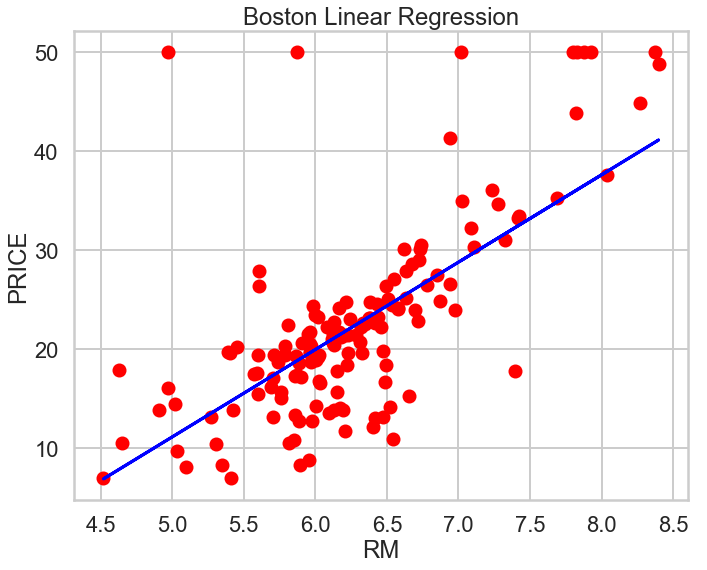

In [21]:
#Draw the regressing line based on the predicted output

fig = plt.figure(figsize=(11,9))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Boston Linear Regression')

ax.set_xlabel('RM')
ax.set_ylabel('PRICE')

plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue',linewidth=3)

plt.show()